## 项目：我的微信好友
### 开始战斗！

通过开源的微信个人号接口 [itchat](http://itchat.readthedocs.io/zh/latest/) 来实现 Python 调用微信好友数据，并做一些有趣的统计和分析

### 项目内容

将完成以下5个任务：

**任务0 - 登陆微信，并通过向文件传输助手发送打招呼信息**

**任务1 - 统计你的微信好友的男女比例**

**任务2 - 分析微信好友的地域分布**

**任务3 - 生成微信好友的签名词云图**

**任务4 - 对签名进行情感分析**

---

## 任务0. 登陆并发送打招呼信息


In [1]:
# 导入项目中所需要的包
import pandas as pd
import re
import os 
import numpy as np
import pinyin
import matplotlib.pyplot as plt
import itchat
%matplotlib inline

print("所有库导入成功！")

所有库导入成功！


In [2]:
# 调用login()函数以登录网页微信
itchat.login()

Getting uuid of QR code.
Please scan the QR code to log in.
Please press confirm on your phone.
Loading the contact, this may take a little while.
Login successfully as GK


#读取数据

In [3]:

# 读取数据
use_fake_dataset = False
if not use_fake_dataset:
    dataset = itchat.get_friends(update=True)[0:]
else:
    dataset = pd.read_csv('wechat_friends.csv').fillna('').to_dict('records')


---

### 打招呼

 - 将想要发送的信息内容赋值给`message`

In [4]:
message = "hello"

In [5]:
# 发送消息
itchat.send(message, 'filehelper')


<ItchatReturnValue: {u'MsgID': u'8513019612896591061', u'LocalID': u'15323085671437', u'BaseResponse': {u'ErrMsg': u'\u8bf7\u6c42\u6210\u529f', u'Ret': 0, 'RawMsg': u'\u8bf7\u6c42\u6210\u529f'}}>

In [6]:
### 退出登陆
itchat.logout()

LOG OUT!


<ItchatReturnValue: {'BaseResponse': {'Ret': 0, 'ErrMsg': u'\u8bf7\u6c42\u6210\u529f', 'RawMsg': 'logout successfully.'}}>

---

## 任务1. 好友男女比例

从数据集中取出以下几个部分：
- NickName：微信昵称
- Sex：性别，1表示男性，2表示女性
- Province：省份
- City：城市
- Signature：微信签名

In [7]:
def preprocess_data(dataset):
    
    data = [{'NickName': item['NickName'], 
            'Sex': item['Sex'], 
            'Province': item['Province'], 
            'City': item['City'], 
            'Signature': item['Signature']} 
            for item in dataset]
    
    return data

pre_data = preprocess_data(dataset)

In [8]:
print(type(pre_data))

<type 'list'>


In [9]:
print(pre_data[0])
print(type(pre_data[0]))

{'Province': '', 'City': '', 'Signature': u'\u5d02\u5c71\u9053\u58eb', 'NickName': u'GK', 'Sex': 1}
<type 'dict'>


In [10]:
print(pre_data[0]['NickName'])

GK


### 练习：统计男女比例
- 统计好友性别，分为男性、女性与未知三种，赋值到已经定义好的`sex`字典中。

提示：
- `pre_data`中1表示男性、2表示女性；
- *注意*：数据需要从第1条开始计算，因为**第0条是自己**。

In [11]:
sex = {
    'male': 0,
    'female': 0,
    'unknown': 0
}

for item in pre_data[1:]:
    if(item['Sex'] == 1.0):
        sex['male'] += 1
    elif(item['Sex'] == 2.0):
        sex['female'] += 1
    else:
        sex['unknown'] += 1

In [13]:
print("我的好友中共有", sex['male'],"位男性、", sex['female'], "位女性，有", sex['unknown'], "位好友未填写。")

('\xe6\x88\x91\xe7\x9a\x84\xe5\xa5\xbd\xe5\x8f\x8b\xe4\xb8\xad\xe5\x85\xb1\xe6\x9c\x89', 159, '\xe4\xbd\x8d\xe7\x94\xb7\xe6\x80\xa7\xe3\x80\x81', 113, '\xe4\xbd\x8d\xe5\xa5\xb3\xe6\x80\xa7\xef\xbc\x8c\xe6\x9c\x89', 36, '\xe4\xbd\x8d\xe5\xa5\xbd\xe5\x8f\x8b\xe6\x9c\xaa\xe5\xa1\xab\xe5\x86\x99\xe3\x80\x82')


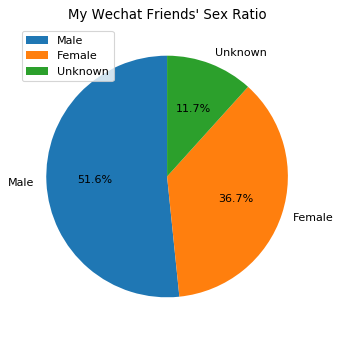

In [14]:
plt.figure(figsize=(8,5), dpi=80)
plt.axes(aspect=1) 
plt.pie([sex['male'], sex['female'], sex['unknown']],
        labels=['Male','Female','Unknown'],
        labeldistance = 1.1,
        autopct = '%3.1f%%',
        shadow = False,
        startangle = 90,
        pctdistance = 0.6 
)

plt.legend(loc='upper left',)
plt.title("My Wechat Friends' Sex Ratio")
plt.show()



**饼状图**是一种常见的单变量图形，用于描绘分类变量级别的相对频率。饼图中的频率用圆形的扇区表示：角度或面积越大，该分类值就越常见。


## 任务2. 好友地域分布
### 练习：统计好友省份


*注意*：数据需要从第1条开始计算，因为**第0条是自己**。

In [15]:
province = []
for index in range(len(pre_data)):
    if(index == 0):
        continue
    if(pre_data[index]['Province'] == ''):
        continue
    else:
        province.append(pre_data[index]['Province'])


In [16]:
province = [pinyin.get(i, format="strip", delimiter="") for i in province if i != '']

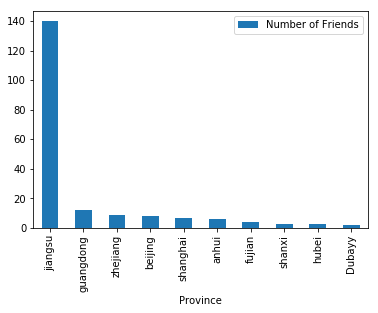

In [17]:
province = pd.DataFrame(province)
province.columns = ['Province']
province['Number of Friends'] = 1
province.groupby('Province').sum().sort_values('Number of Friends', ascending=False)[:10].plot.bar()

**条形图**用于描述分类变量的分布情况。在条形图中，分类变量的每个级别用长条表示，高度表示数据在该级别的出现频率。

---

## 任务3. 生成好友个性签名词云图

在这里我们希望生成词云，只需要调用第三方库即可，Python有大量的库可以使用，能极大提高开发效率，是编程入门的绝佳选择。

### 练习：打印个性签名
* 使用`print()`语句打印出最长的3个个性签名

In [18]:
#max1 = 1
#max2 = 1
#max3 = 1
#for index in range(len(pre_data)):
#    if(index==0):
#        continue
#    if(len(pre_data[index]['Signature']) > len(pre_data[max1]['Signature'])):
#        max3 = max2
#        max2 = max1
#        max1 = index
signature_temp = [item['Signature'] for item in pre_data]
def f(x):
    return len(x)
signature_temp.sort(key = f)
print(signature_temp[-1])
print(signature_temp[-2])
print(signature_temp[-3])
#print(pre_data[max1]['Signature'])
#print(pre_data[max2]['Signature'])
#print(pre_data[max3]['Signature'])        
    

🍍<span class="emoji emoji1f34a"></span>🍈<span class="emoji emoji1f354"></span>🧀🍖🍤<span class="emoji emoji1f373"></span><span class="emoji emoji1f35d"></span>🍕🌭<span class="emoji emoji1f35f"></span>🌮🌯<span class="emoji emoji1f440"></span>
<span class="emoji emoji2728"></span> 爱家人 爱朋友 爱自己 爱生活<span class="emoji emoji2764"></span>️
学会好好生活<span class="emoji emoji2600"></span>️<span class="emoji emoji1f490"></span>👪


In [19]:
from wordcloud import WordCloud
import jieba

tList = []
for i in pre_data:
    signature = i["Signature"].replace(" ", "").replace("span", "").replace("class", "").replace("emoji", "")
    rep = re.compile("1f\d.+")
    signature = rep.sub("", signature)
    if len(signature) > 0:
        tList.append(signature)
    
text = "".join(tList)

wordlist_jieba = jieba.cut(text, cut_all=True)
wl_space_split = " ".join(wordlist_jieba)

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/km/gck076ps44j_nzs5xp3x2nxw0000gn/T/jieba.cache
Loading model cost 2.597 seconds.
Prefix dict has been built succesfully.


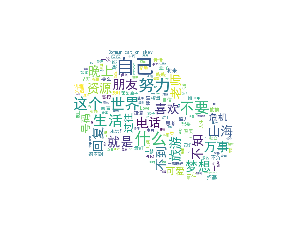

In [20]:
import PIL.Image as Image

alice_coloring = np.array(Image.open("wechat.jpg"))

my_wordcloud = WordCloud(background_color="white", max_words=2000, mask=alice_coloring,
                         max_font_size=40, random_state=42, font_path='./SimHei.ttf').generate(wl_space_split)


plt.imshow(my_wordcloud)
plt.axis("off")
plt.show()

my_wordcloud.to_file(os.path.join("wechatfriends_wordcloud.png"))

---

## 任务4. 对好友签名进行情感分析
调用了[SnowNLP](https://github.com/isnowfy/snownlp)的情感分析，它是一个python写的类库，可以方便的处理中文文本内容，不用我们实现其中具体的代码。一般来说，情感分析的目的是为了找出作者观点的态度，是正向还是负向，或者更具体的，我希望知道他的情绪。

在这里，我们希望了解到好友签名所表达出来的情感是积极的，还是中立、负面的，比如说在以下例子中，我们对"这个商品我非常喜欢，颜色很合我意！"这句话进行了预处理，并通过训练好的模型预测其的情感。

在这里，我们简单地假设大于0.66表示积极，低于0.33表示消极，其他表示中立。


In [21]:
from snownlp import SnowNLP

text = "这个商品我非常喜欢，颜色很合我意！"
sentiment = SnowNLP(text).sentiments

print(sentiment)

0.5


接下来，将好友的签名进行文本预处理，并尝试统计其中积极、中立、消极的个数。

### 练习：统计好友签名情感分析结果比例
* 统计sentiments中**大于0.66**的个数
* 统计sentiments中**大于等于0.33且小于等于0.66**的个数
* 统计sentiments中**小于0.33**的个数

提示：可以用循环语句或者列表表达式实现。

In [22]:
sentiments = []
for i in tList:
    sentiments.append(SnowNLP(i).sentiments) 

In [23]:
### 统计sentiments中大于0.66的个数
positive = 0
for sentiment in sentiments:
    if(sentiment > 0.66):
        positive += 1
### 统计sentiments中大于等于0.33且小于等于0.66的个数
neutral = 0
for sentiment in sentiments:
    if(sentiment <= 0.66 and sentiment >= 0.33):
        neutral += 1
### 统计sentiments中小于0.33的个数
negative = 0
for sentiment in sentiments:
    if(sentiment < 0.33):
        negative += 1

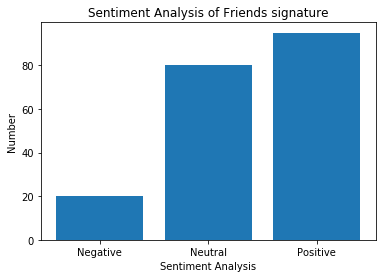

In [25]:
labels = [u'Negative',u'Neutral',u'Positive']
values = (negative,neutral,positive)
plt.xlabel(u'Sentiment Analysis')
plt.ylabel(u'Number')
plt.xticks(range(3),labels)
plt.bar(range(3), values)

plt.title('Sentiment Analysis of Friends signature')
plt.show()